Task 1: Loading and visualizing MNIST


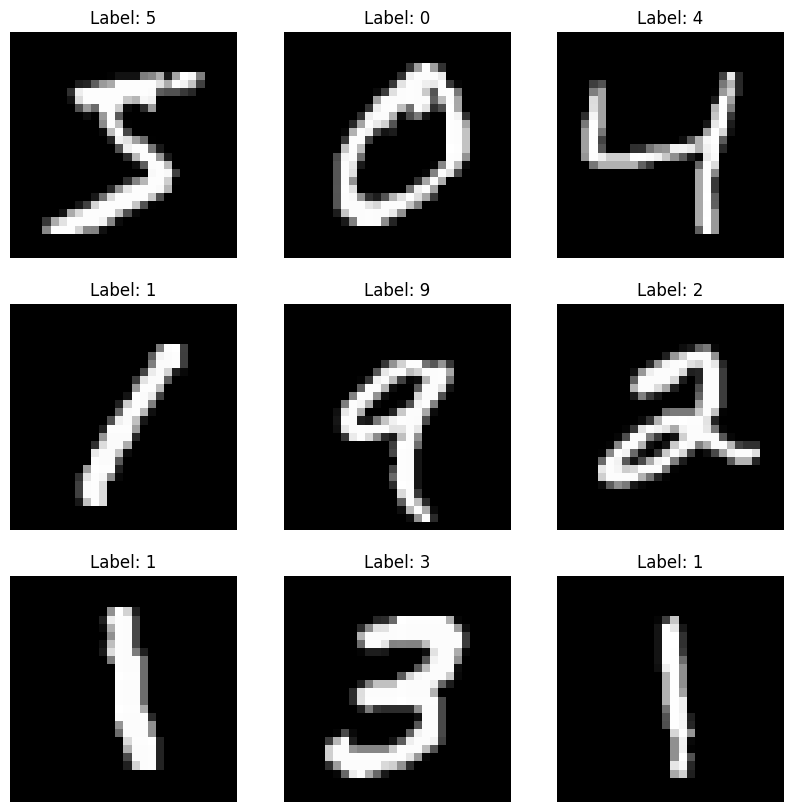


Task 2: Preprocessing data
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)

Task 3: Building CNN model


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.8748 - loss: 0.4189 - val_accuracy: 0.9808 - val_loss: 0.0674
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9834 - loss: 0.0556 - val_accuracy: 0.9857 - val_loss: 0.0481
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9897 - val_loss: 0.0381
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9883 - val_loss: 0.0389
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9940 - loss: 0.0176 - val_accuracy: 0.9896 - val_loss: 0.0375
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9878 - loss: 0.0395

Test accuracy: 0.9907


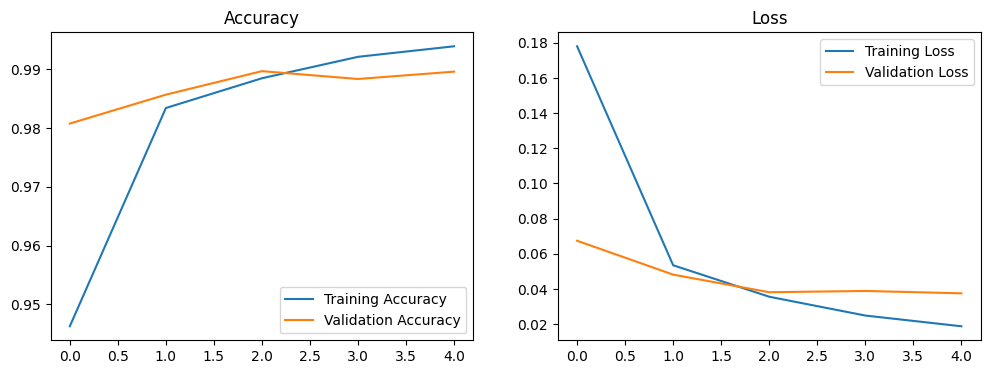

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

def task1_visualize_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_train[i], cmap='gray')
        plt.title(f"Label: {y_train[i]}")
        plt.axis('off')
    plt.show()
    
    return X_train, y_train, X_test, y_test

def task2_preprocess_data(X_train, X_test, y_train, y_test):
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)
    
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    
    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test

def task3_build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.summary()
    return model

print("Task 1: Loading and visualizing MNIST")
X_train, y_train, X_test, y_test = task1_visualize_mnist()

print("\nTask 2: Preprocessing data")
X_train, X_test, y_train, y_test = task2_preprocess_data(X_train, X_test, y_train, y_test)

print("\nTask 3: Building CNN model")
model = task3_build_cnn_model(X_train.shape[1:])

print("\nTraining the model...")
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=64,
                    validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()